**Iport Libraries**

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cbook import boxplot_stats
import seaborn as sns
import math
from scipy.stats import entropy as en
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler


# Xcel to csv


In [137]:
CollectedData_Xcel= pd.read_excel('CollectedData.xlsx')
 
#print(CollectedData_Xcel.head())
CollectedData_Xcel.to_csv ("CollectedData.csv", index = None, header=True)
CollectedData_csv = pd.read_csv("CollectedData.csv")
#print(CollectedData_csv.head())
CollectedData_csv=CollectedData_csv.rename(columns={CollectedData_csv.columns[2]:'Age',CollectedData_csv.columns[7]:'AMV',CollectedData_csv.columns[21]:'Clo',CollectedData_csv.columns[18]:'Met',CollectedData_csv.columns[25]:'Dewpt',CollectedData_csv.columns[26]:'PlaneRadTemp',CollectedData_csv.columns[36]:'Ta',CollectedData_csv.columns[37]:'Tmrt',CollectedData_csv.columns[39]:'Vel',CollectedData_csv.columns[41]:'AirTurb',CollectedData_csv.columns[42]:'Pa',CollectedData_csv.columns[43]:'Rh',CollectedData_csv.columns[73]:'TaOutdoor',CollectedData_csv.columns[76]:'RhOutdoor',CollectedData_csv.columns[48]:'PMV'})
CollectedData_csv.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12565 entries, 0 to 12564
Data columns (total 80 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   8                   12561 non-null  float64
 1   1                   12562 non-null  float64
 2   Age                 9650 non-null   float64
 3   0                   12340 non-null  float64
 4   1993                11213 non-null  float64
 5   146                 12549 non-null  float64
 6   Unnamed: 6          9746 non-null   float64
 7   AMV                 12510 non-null  float64
 8   1.1                 12514 non-null  float64
 9   Unnamed: 9          3354 non-null   float64
 10  Unnamed: 10         11778 non-null  float64
 11  Unnamed: 11         4638 non-null   float64
 12  Unnamed: 12         3371 non-null   float64
 13  Unnamed: 13         5623 non-null   float64
 14  Unnamed: 14         4909 non-null   float64
 15  Unnamed: 15         4866 non-null   float64
 16  Unna

***Part A. Preprocessing***

In [138]:
Selecting_the_data = pd.DataFrame(CollectedData_csv, columns=['Age','Clo','Met','Dewpt','PlaneRadTemp','Ta','Tmrt','Vel','AirTurb','Pa','Rh','TaOutdoor','RhOutdoor','AMV','PMV'])
print(Selecting_the_data)
DataType = Selecting_the_data.dtypes
print('-------Data type of each column of Dataframe :------')
print(DataType)
print('---------NUMBER OF NULLS IN EACH COlumn---------')
print(CollectedData_csv[['Age','Clo','Met','Dewpt','PlaneRadTemp','Ta','Tmrt','Vel','AirTurb','Pa','Rh','TaOutdoor','RhOutdoor','AMV','PMV']].isna().sum())


print('---------Find min---------')

print(CollectedData_csv[['Age','Clo','Met','Dewpt','PlaneRadTemp','Ta','Tmrt','Vel','AirTurb','Pa','Rh','TaOutdoor','RhOutdoor','AMV','PMV']].min())
print('---------Find max---------')
print(CollectedData_csv[['Age','Clo','Met','Dewpt','PlaneRadTemp','Ta','Tmrt','Vel','AirTurb','Pa','Rh','TaOutdoor','RhOutdoor','AMV','PMV']].max())
print('---------Find varience---------')
print(CollectedData_csv[['Age','Clo','Met','Dewpt','PlaneRadTemp','Ta','Tmrt','Vel','AirTurb','Pa','Rh','TaOutdoor','RhOutdoor','AMV','PMV']].var())

print('---------Find STD---------')

print(CollectedData_csv[['Age','Clo','Met','Dewpt','PlaneRadTemp','Ta','Tmrt','Vel','AirTurb','Pa','Rh','TaOutdoor','RhOutdoor','AMV','PMV']].std())
print("\n----------- Calculate Mean -----------\n")
print(Selecting_the_data.mean())
 
print("\n----------- Calculate Median -----------\n")
print(Selecting_the_data.median())
 
print("\n----------- Calculate Mode -----------\n")
print(Selecting_the_data.mode())

print("\n----------- Calculate Outliers -----------\n")
for i in range(0,15):
  Outliers=Selecting_the_data[Selecting_the_data.columns[i]].dropna()
  stats=boxplot_stats(Outliers)
  print(len(set(stats[0]['fliers'])))

          Age   Clo  Met   Dewpt  PlaneRadTemp         Ta       Tmrt   Vel  \
0         NaN  0.78  2.1     NaN           NaN  19.100000  19.629472  0.06   
1         NaN  1.05  2.1     NaN           NaN  20.000000  19.046655  0.06   
2         NaN  0.40  2.6     NaN           NaN  21.000000  20.153116  0.06   
3         NaN  0.37  3.0     NaN           NaN  23.000000  21.942458  0.06   
4         NaN  1.29  2.1     NaN           NaN  19.800000  19.429333  0.06   
...       ...   ...  ...     ...           ...        ...        ...   ...   
12560  1996.0   NaN  0.1  22.122           NaN  22.142437        NaN   NaN   
12561  1996.0   NaN  0.1  22.122           NaN  22.142437        NaN   NaN   
12562  1996.0   NaN  0.1  22.122           NaN  22.142437        NaN   NaN   
12563  1996.0   NaN  0.1  22.122           NaN  22.142437        NaN   NaN   
12564  1996.0   NaN  0.1  22.122           NaN  22.142437        NaN   NaN   

        AirTurb    Pa    Rh  TaOutdoor  RhOutdoor  AMV   PMV  


# **Histogram & Box PLOT** 


-----HISTOGRAM--------



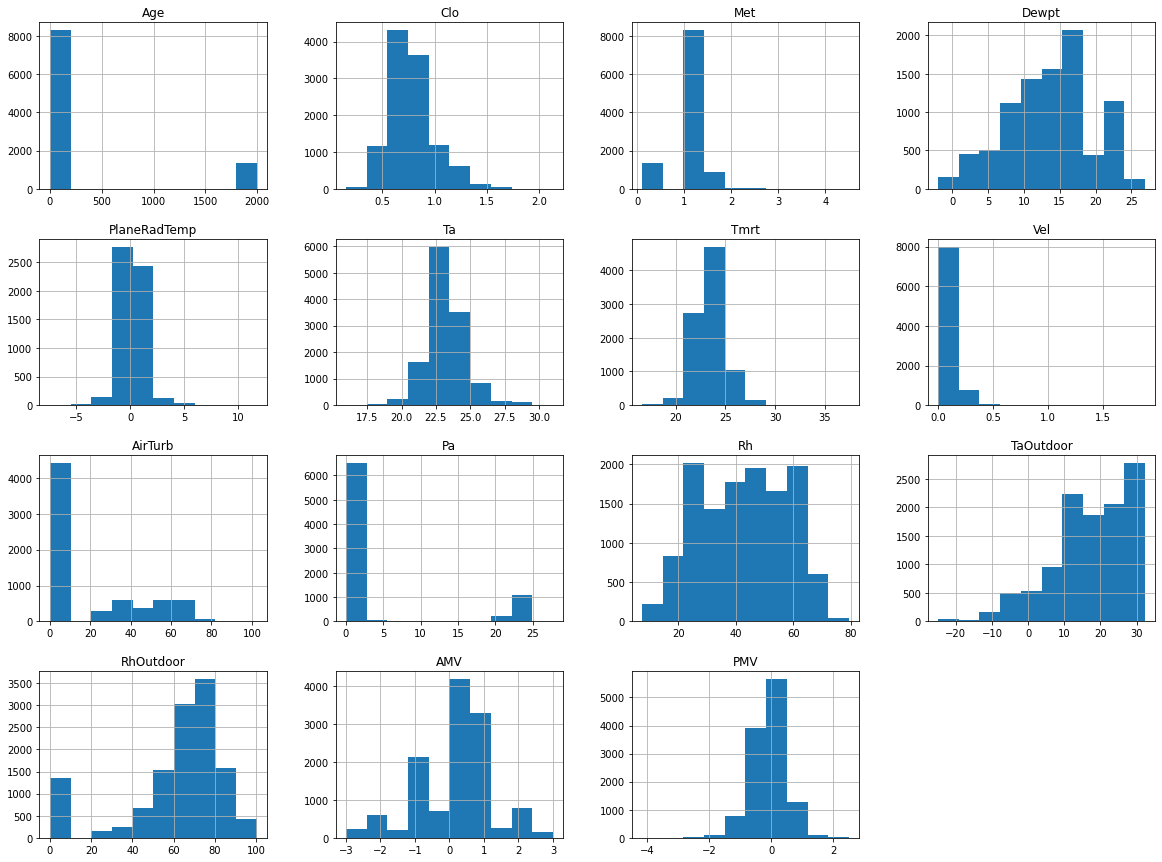


-----BoxPlot--------





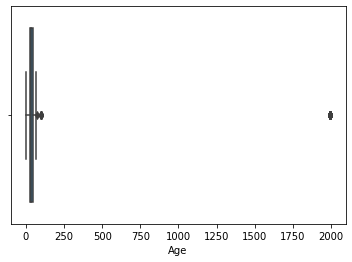

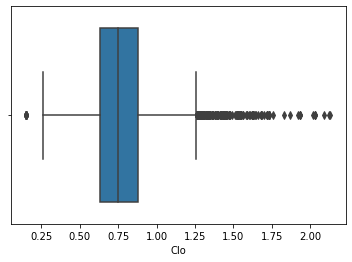

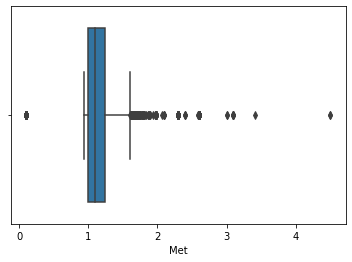

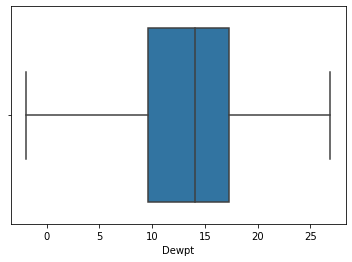

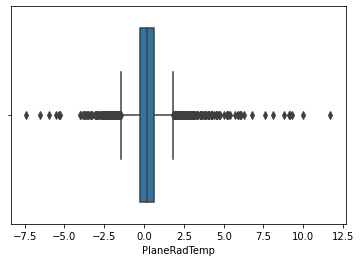

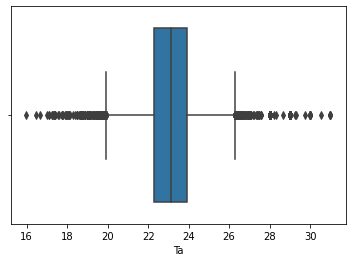

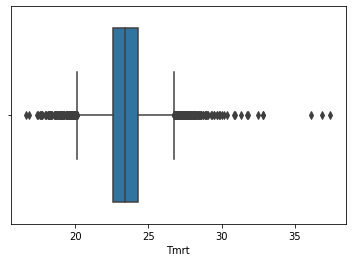

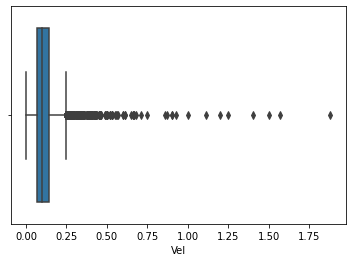

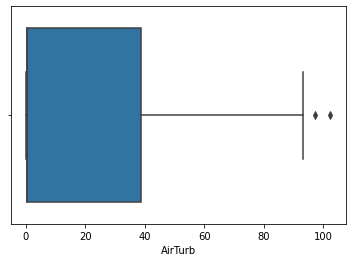

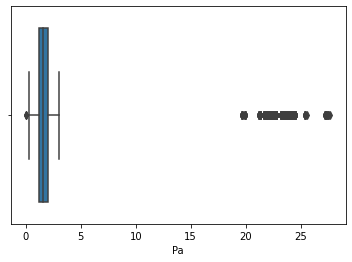

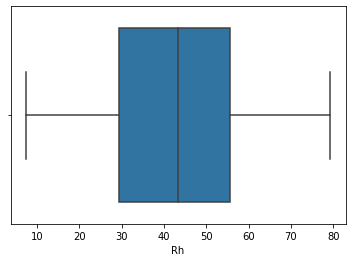

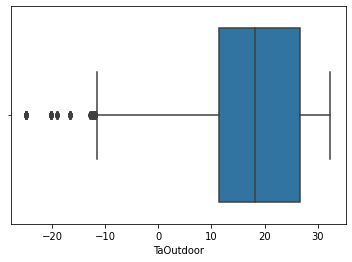

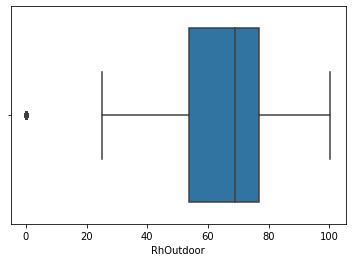

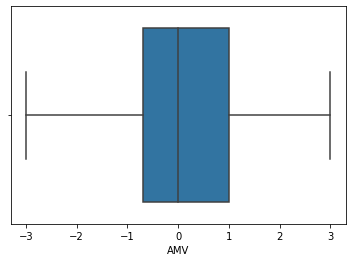

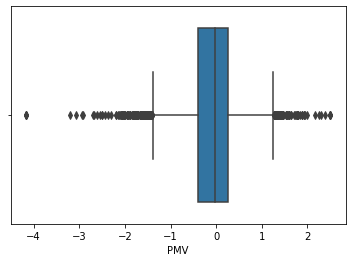

In [139]:
print("\n-----HISTOGRAM--------\n")

Selecting_the_data.hist(bins=10,figsize = [20 , 15])
plt.show()
print("\n-----BoxPlot--------\n")
for i in range(0,15):
  print("\n")
  sns.boxplot(x=Selecting_the_data[Selecting_the_data.columns[i]])
  plt.show()


# **FILL THE MISSING VALUES**

In [144]:
#mean_value=Selecting_the_data['Clo'].mean()
  
# Replace NaNs in column S2 with the
# mean of values in the same column
Selecting_the_data['Age'] = Selecting_the_data['Age'].fillna(Selecting_the_data['Age']).median()
#print(CollectedData_csv['Age'].isnull().sum())

Selecting_the_data['Clo'] = Selecting_the_data['Clo'].fillna(Selecting_the_data['Clo']).mean()
#print(CollectedData_csv['Age'].isnull().sum())

Selecting_the_data['Met'] = Selecting_the_data['Met'].fillna(Selecting_the_data['Met']).median()
#print(CollectedData_csv['Met'].isnull().sum())

Selecting_the_data['Dewpt'] = Selecting_the_data['Dewpt'].fillna(Selecting_the_data['Dewpt']).median()
#print(CollectedData_csv['Dewpt'].isnull().sum())

Selecting_the_data['PlaneRadTemp'] = Selecting_the_data['PlaneRadTemp'].fillna(Selecting_the_data['PlaneRadTemp']).mean()
#print(CollectedData_csv['PlaneRadTemp'].isnull().sum())

Selecting_the_data['Ta'] = Selecting_the_data['Ta'].fillna(Selecting_the_data['Ta']).median()
#print(CollectedData_csv['Ta'].isnull().sum())

Selecting_the_data['Tmrt'] = Selecting_the_data['Tmrt'].fillna(Selecting_the_data['Tmrt']).mean()
#print(CollectedData_csv['Tmrt'].isnull().sum())

Selecting_the_data['Vel'] = Selecting_the_data['Vel'].fillna(Selecting_the_data['Vel']).median()
#print(CollectedData_csv['Vel'].isnull().sum())

Selecting_the_data['AirTurb'] = Selecting_the_data['AirTurb'].fillna(Selecting_the_data['AirTurb']).median()
#print(CollectedData_csv['AirTurb'].isnull().sum())

Selecting_the_data['Pa'] = Selecting_the_data['Pa'].fillna(Selecting_the_data['Pa']).median()
#print(CollectedData_csv['Pa'].isnull().sum())

Selecting_the_data['Rh'] = Selecting_the_data['Rh'].fillna(Selecting_the_data['Rh']).median()
#print(CollectedData_csv['Rh'].isnull().sum())

Selecting_the_data['TaOutdoor'] = Selecting_the_data['TaOutdoor'].fillna(Selecting_the_data['TaOutdoor']).median()
#print(CollectedData_csv['TaOutdoor'].isnull().sum())

Selecting_the_data['RhOutdoor'] = Selecting_the_data['RhOutdoor'].fillna(Selecting_the_data['RhOutdoor']).median()
#print(CollectedData_csv['RhOutdoor'].isnull().sum())

Selecting_the_data['AMV'] = Selecting_the_data['AMV'].fillna(Selecting_the_data['AMV']).median()
#print(CollectedData_csv['AMV'].isnull().sum())

Selecting_the_data['PMV'] = Selecting_the_data['PMV'].fillna(Selecting_the_data['PMV']).median()
#print(CollectedData_csv['PMV'].isnull().sum())

#Verifying for any missing values
print("NULL Values After The Insertion Of Missing Values :- ")
#print(Selecting_the_data['Age','Clo','Met','Dewpt','PlaneRadTemp','Ta','Tmrt','Vel','AirTurb','Pa','Rh','TaOutdoor','RhOutdoor','AMV','PMV']
print(Selecting_the_data)

NULL Values After The Insertion Of Missing Values :- 
        Age       Clo  Met  Dewpt  PlaneRadTemp         Ta       Tmrt  Vel  \
0      35.0  0.778503  1.1   14.1      0.217785  23.136667  23.450693  0.1   
1      35.0  0.778503  1.1   14.1      0.217785  23.136667  23.450693  0.1   
2      35.0  0.778503  1.1   14.1      0.217785  23.136667  23.450693  0.1   
3      35.0  0.778503  1.1   14.1      0.217785  23.136667  23.450693  0.1   
4      35.0  0.778503  1.1   14.1      0.217785  23.136667  23.450693  0.1   
...     ...       ...  ...    ...           ...        ...        ...  ...   
12560  35.0  0.778503  1.1   14.1      0.217785  23.136667  23.450693  0.1   
12561  35.0  0.778503  1.1   14.1      0.217785  23.136667  23.450693  0.1   
12562  35.0  0.778503  1.1   14.1      0.217785  23.136667  23.450693  0.1   
12563  35.0  0.778503  1.1   14.1      0.217785  23.136667  23.450693  0.1   
12564  35.0  0.778503  1.1   14.1      0.217785  23.136667  23.450693  0.1   

       Ai

# Handling the Noisy data

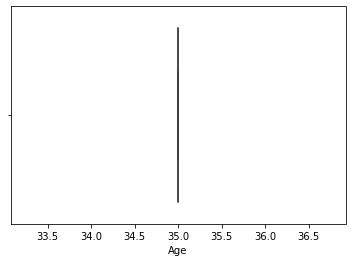

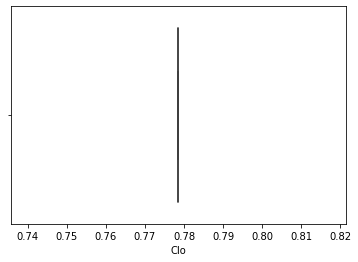

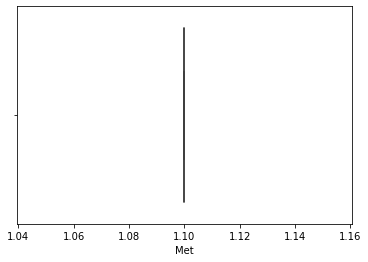

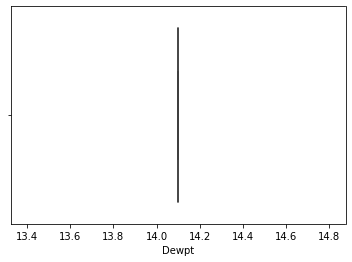

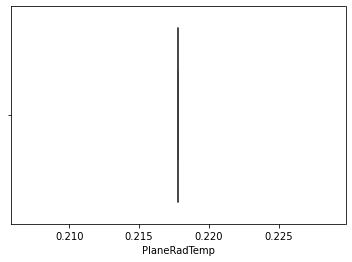

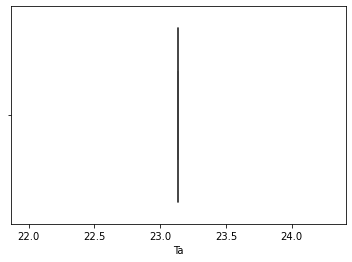

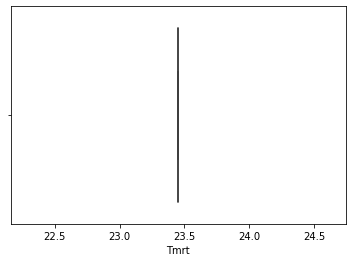

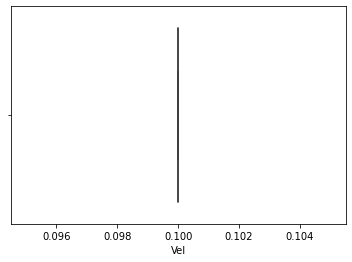

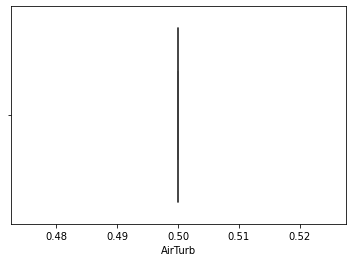

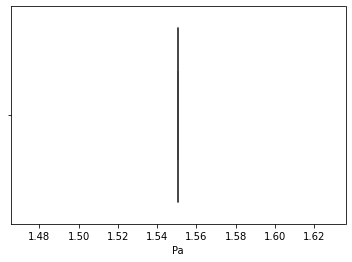

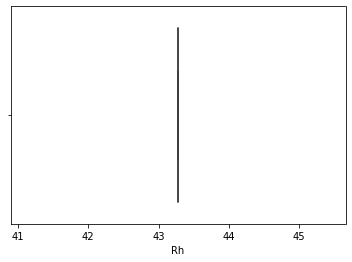

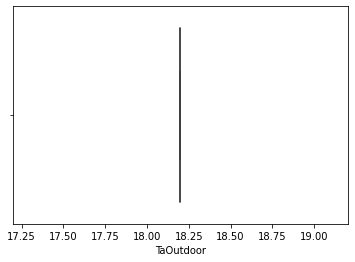

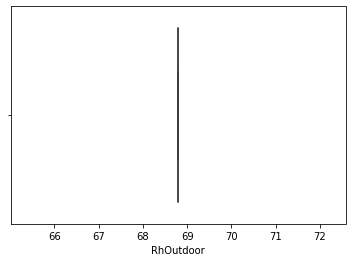

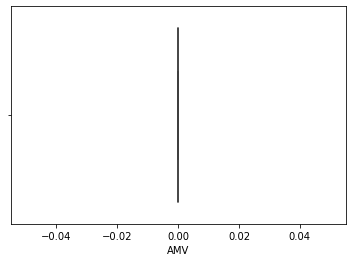

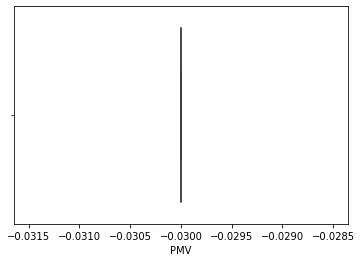

In [146]:



for i in range(0,15):
  print("\n")
  sns.boxplot(x=Selecting_the_data[Selecting_the_data.columns[i]])
  plt.show()



In [ ]:
#Question_4
#Finding Number Of Outliers
    
Q1 = Selecting_the_data.quantile(0.25)
Q3 = Selecting_the_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print((Selecting_the_data < ((Q1 - 1.5 * IQR)) | (Selecting_the_data > (Q3 + 1.5 * IQR))))

data_ = Selecting_the_data[~((Selecting_the_data< (Q1 - 1.5 * IQR)) |(Selecting_the_data> (Q3 + 1.5 * IQR))).any(axis=1)]
data_.shape
Selecting_the_data.hist(bins=10,figsize = [20 , 15])
plt.show()

# Allpy **Filters**

In [ ]:
#Question_5
#Applying Filter
variance = Selecting_the_data.var()
columns = Selecting_the_data.columns
v = []

for i in range(0 , len(variance)):
    if variance[i] >= 0.2:
       v.append(columns[i])  

# **Heat Map**

In [ ]:
dataplot = sns.heatmap(Selecting_the_data.corr() , cmap = "Blues" , annot = True , annot_kws = {'size' : 5} )
plt.show()

# Entropy and information **gain**

In [ ]:
#Entropy
print("\n----------- Calculate Entropy -----------\n")
for i in range(0,15):
    arr = pd.Series(Selecting_the_data[Selecting_the_data.columns[i]])
    data = arr.value_counts()
    print(list(Selecting_the_data.columns)[i] , (en(data)))

In [ ]:
#Information_Gain
print("\n----------- Calculate Information_Gain -----------\n")
class0 = 10/100
class1 = 90/100
# calculate entropy
entropy = -(class0 * log2(class0) + class1 * log2(class1))
# print the result
print('entropy: %.3f bits' % entropy)

# **Part B Analysis Algorithm**

In [ ]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(Selecting_the_data)
print("Normalized Dataset In The Form Of Array :- \n")
print(normalized_data)
print("\n")
print("Normalized data in the form of Data Set : ")
normalized_data = pd.DataFrame(normalized_data , columns = Selecting_the_data.columns)
print(normalized_data)